In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
text1 = 'She sells seashells by the seashore.'
text2 = '"Seashells! The seashells are on sale! By the seashore."'
text3 = 'She sells 3 seashells to John, who lives by the lake.'

In [4]:
words_lists = [text.split() for text in [text1, text2, text3]]
words1, words2, words3 = words_lists
for i, words in enumerate(words_lists, 1):
    print(f"Words in text {i}")
    print(f"{words}\n")

Words in text 1
['She', 'sells', 'seashells', 'by', 'the', 'seashore.']

Words in text 2
['"Seashells!', 'The', 'seashells', 'are', 'on', 'sale!', 'By', 'the', 'seashore."']

Words in text 3
['She', 'sells', '3', 'seashells', 'to', 'John,', 'who', 'lives', 'by', 'the', 'lake.']



In [5]:
def simplify_text(text):
    for punctuation in ['.', ',', '!', '?', '"']:
        text = text.replace(punctuation, '')
    return text.lower()
for i, words in enumerate(words_lists, 1):
    for j, word in enumerate(words):
        words[j] = simplify_text(word)
        print(f"Words in text {i}")
        print(f"{words}\n")

Words in text 1
['she', 'sells', 'seashells', 'by', 'the', 'seashore.']

Words in text 1
['she', 'sells', 'seashells', 'by', 'the', 'seashore.']

Words in text 1
['she', 'sells', 'seashells', 'by', 'the', 'seashore.']

Words in text 1
['she', 'sells', 'seashells', 'by', 'the', 'seashore.']

Words in text 1
['she', 'sells', 'seashells', 'by', 'the', 'seashore.']

Words in text 1
['she', 'sells', 'seashells', 'by', 'the', 'seashore']

Words in text 2
['seashells', 'The', 'seashells', 'are', 'on', 'sale!', 'By', 'the', 'seashore."']

Words in text 2
['seashells', 'the', 'seashells', 'are', 'on', 'sale!', 'By', 'the', 'seashore."']

Words in text 2
['seashells', 'the', 'seashells', 'are', 'on', 'sale!', 'By', 'the', 'seashore."']

Words in text 2
['seashells', 'the', 'seashells', 'are', 'on', 'sale!', 'By', 'the', 'seashore."']

Words in text 2
['seashells', 'the', 'seashells', 'are', 'on', 'sale!', 'By', 'the', 'seashore."']

Words in text 2
['seashells', 'the', 'seashells', 'are', 'on', 

In [6]:
words_sets = [set(words) for words in words_lists]
for i, unique_words in enumerate(words_sets, 1):
    print(f"Unique Words in text {i}")
    print(f"{unique_words}\n")

Unique Words in text 1
{'sells', 'the', 'she', 'seashells', 'seashore', 'by'}

Unique Words in text 2
{'sale', 'the', 'seashells', 'on', 'seashore', 'are', 'by'}

Unique Words in text 3
{'lake', 'sells', 'to', 'the', 'she', '3', 'seashells', 'who', 'john', 'lives', 'by'}



In [7]:
words_set1 = words_sets[0]
for i, words in enumerate(words_sets[1:], 2):
    shared_words = words_set1.intersection(words)
    print(f"Texts 1 and {i} share these {len(shared_words)} words:")
    print(f"{shared_words}\n")

Texts 1 and 2 share these 4 words:
{'seashore', 'the', 'seashells', 'by'}

Texts 1 and 3 share these 5 words:
{'sells', 'the', 'she', 'seashells', 'by'}



In [8]:
for i, words_set in enumerate(words_sets[1:], 2):
    diverging_words = words_set1 ^ words_set
    print(f"Texts 1 and {i} don't share these {len(diverging_words)} words:")
    print(f"{diverging_words}\n")

Texts 1 and 2 don't share these 5 words:
{'she', 'are', 'sale', 'sells', 'on'}

Texts 1 and 3 don't share these 7 words:
{'lake', 'to', '3', 'who', 'john', 'lives', 'seashore'}



In [9]:
for i, words_set in enumerate(words_sets[1:], 2):
    total_words = words_set1 | words_set
    print(f"Together, texts 1 and {i} contain {len(total_words)} nique words. These words are:\n {total_words}\n")

Together, texts 1 and 2 contain 9 nique words. These words are:
 {'sale', 'sells', 'the', 'she', 'seashells', 'on', 'seashore', 'are', 'by'}

Together, texts 1 and 3 contain 12 nique words. These words are:
 {'the', 'she', 'lives', 'by', 'lake', 'sells', 'to', 'who', '3', 'seashells', 'john', 'seashore'}



In [10]:
for i, words_set in enumerate(words_sets[1:], 2):
    shared_words = words_set1 & words_set
    diverging_words = words_set1 ^ words_set
    total_words = words_set1 | words_set
    assert len(total_words) == len(shared_words) + len(diverging_words)
    percent_shared = 100 * len(shared_words) / len(total_words)
    percent_diverging = 100 * len(diverging_words) / len(total_words)
    print(f"Together, texts 1 and {i} contain {len(total_words)} "
f"unique words. \n{percent_shared:.2f}% of these words are "
f"shared. \n{percent_diverging:.2f}% of these words diverge.\n")

Together, texts 1 and 2 contain 9 unique words. 
44.44% of these words are shared. 
55.56% of these words diverge.

Together, texts 1 and 3 contain 12 unique words. 
41.67% of these words are shared. 
58.33% of these words diverge.



In [11]:
def jaccard_similarity(text_a, text_b):
    word_set_a, word_set_b = [set(simplify_text(text).split()) for text in [text_a, text_b]]
    num_shared = len(word_set_a & word_set_b)
    num_total = len(word_set_a | word_set_b)
    return num_shared / num_total
for text in [text2, text3]:
    similarity = jaccard_similarity(text1, text)
    print(f"The Jaccard similarity between '{text1}' and '{text}' "
    f"equals {similarity:.4f}." "\n")

The Jaccard similarity between 'She sells seashells by the seashore.' and '"Seashells! The seashells are on sale! By the seashore."' equals 0.4444.

The Jaccard similarity between 'She sells seashells by the seashore.' and 'She sells 3 seashells to John, who lives by the lake.' equals 0.4167.



In [12]:
def jaccard_similarity_efficient(text_a, text_b):
    word_set_a, word_set_b = [set(simplify_text(text).split()) for text in [text_a, text_b]]
    num_shared = len(word_set_a & word_set_b)
    num_total = len(word_set_a) + len(word_set_b) - num_shared
    return num_shared / num_total
for text in [text2, text3]:
    similarity = jaccard_similarity_efficient(text1, text)
    assert similarity == jaccard_similarity(text1, text)

In [13]:
words_set1, words_set2, words_set3 = words_sets
total_words = words_set1 | words_set2 | words_set3
vocabulary = {word : i for i, word in enumerate(total_words)}
value_to_word = {value: word for word, value in vocabulary.items()}
print(f"Our vocabulary contains {len(vocabulary)} words. "
f"This vocabulary is:\n{vocabulary}")

Our vocabulary contains 15 words. This vocabulary is:
{'the': 0, 'she': 1, 'lives': 2, 'are': 3, 'by': 4, 'lake': 5, 'sale': 6, 'sells': 7, 'to': 8, 'who': 9, '3': 10, 'seashells': 11, 'john': 12, 'on': 13, 'seashore': 14}


In [14]:
import seaborn as sns

In [15]:
vectors = []
for i, words_set in enumerate(words_sets, 1):
    vector = np.array([0] * len(vocabulary))
    for word in words_set:
        vector[vocabulary[word]] = 1
    vectors.append(vector)

In [16]:
vectors

[array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]),
 array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]),
 array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])]

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Text 1'), Text(0, 1.5, 'Text 2'), Text(0, 2.5, 'Text 3')])

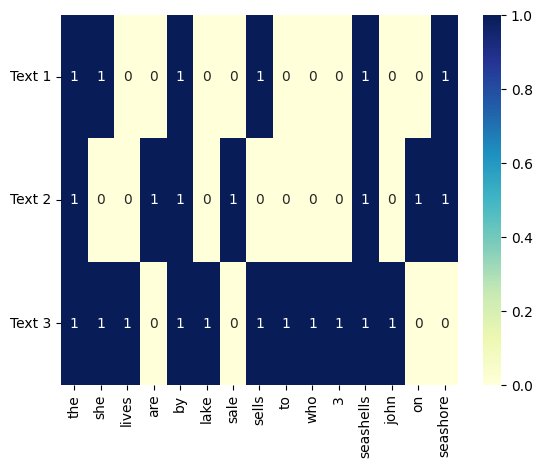

In [21]:
sns.heatmap(vectors, annot=True, cmap='YlGnBu', xticklabels=vocabulary.keys(), yticklabels=['Text 1', 'Text 2', 'Text 3'])
plt.yticks(rotation=0)

In [22]:
vector1, vector2 = vectors[:2]
for i in range(len(vocabulary)):
    if vector1[i] * vector2[i]:
        shared_word = value_to_word[i]
        print(f"'{shared_word}' is present in both texts 1 and 2")

'the' is present in both texts 1 and 2
'by' is present in both texts 1 and 2
'seashells' is present in both texts 1 and 2
'seashore' is present in both texts 1 and 2


In [24]:
shared_word_count = sum(vector1[i] * vector2[i] for i in range(len(vocabulary)))
assert shared_word_count == len(words_set1 & words_set2)

In [25]:
assert vector1.dot(vector2) == shared_word_count

In [26]:
assert vector1 @ vector2 == shared_word_count

In [27]:
def tanimoto_similarity(vector_a, vector_b):
    num_shared = vector_a @ vector_b
    num_total = vector_a @ vector_a + vector_b @ vector_b - num_shared
    return num_shared / num_total
for i, text in enumerate([text2, text3], 1):
    similarity = tanimoto_similarity(vector1, vectors[i])
    assert similarity == jaccard_similarity(text1, text)